In [152]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
data = pd.read_csv(r'global-energy-substitution.csv')

# Summary information about the dataset

print(data.info())
print(data.head())
print(data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 40 non-null     int64  
 1   Other_renewables     40 non-null     float64
 2   Biofuels             40 non-null     float64
 3   Solar                40 non-null     float64
 4   Wind                 40 non-null     float64
 5   Hydropower           40 non-null     float64
 6   Nuclear              40 non-null     float64
 7   Gas                  40 non-null     float64
 8   Oil                  40 non-null     float64
 9   Coal                 40 non-null     float64
 10  Traditional_biomass  40 non-null     int64  
dtypes: float64(9), int64(2)
memory usage: 3.5 KB
None
   Year  Other_renewables   Biofuels     Solar      Wind  Hydropower  \
0  1983         211.77058  49.019240  0.008871  0.096974   5552.5425   
1  1984         236.32065  57.806423  0.018662  

In [125]:
# Statistical summary of numerical columns
print(data.describe())


              Year  Other_renewables     Biofuels        Solar         Wind  \
count    40.000000         40.000000    40.000000    40.000000    40.000000   
mean   2002.500000        926.614106   424.965961   406.457205  1009.701726   
std      11.690452        661.186841   395.714083   831.787953  1513.651807   
min    1983.000000        211.770580    49.019240     0.008871     0.096974   
25%    1992.750000        414.874188   113.515411     1.608126    16.149092   
50%    2002.500000        656.986380   168.664415     5.897006   168.213760   
75%    2012.250000       1361.746000   779.016462   303.204995  1523.960600   
max    2022.000000       2413.807600  1199.206700  3448.237300  5487.600000   

         Hydropower      Nuclear           Gas           Oil          Coal  \
count     40.000000    40.000000     40.000000     40.000000     40.000000   
mean    8334.417520  6466.833565  26663.223025  43939.467375  33599.566300   
std     1862.932716  1119.167565   7679.473830   6280.

In [126]:
# Handling missing values (filling with a default value for instance)
data.fillna(0, inplace=True)
# Removing duplicates
data.drop_duplicates(inplace=True)

In [153]:
# Calculate growth rates for each energy source over time
growth_rates = data.iloc[:, 1:].pct_change() * 100  # Calculate percentage change for each column
print(growth_rates)
# Calculate average growth rates for each energy source
avg_growth_rates = growth_rates.mean()

# Sort the energy sources by average growth rate
sorted_energy_sources = avg_growth_rates.sort_values(ascending=False)

# Identify the fastest and slowest-growing energy sources
fastest_growing_source = sorted_energy_sources.index[0]
slowest_growing_source = sorted_energy_sources.index[-1]

print(f"Fastest-growing energy source: {fastest_growing_source}")
print(f"Slowest-growing energy source: {slowest_growing_source}")


    Other_renewables   Biofuels        Solar        Wind  Hydropower  \
0                NaN        NaN          NaN         NaN         NaN   
1          11.592767  17.925988   110.370297   36.470658    3.387232   
2           2.891961  18.343406    86.139902   43.490958    1.950747   
3           8.443369  23.085630    29.251362  116.180311    1.355082   
4           7.113734   1.338587   -30.168777   40.729567    1.352061   
5           2.980290   4.957307    -3.838892   69.713042    3.204995   
6          10.826308   6.843491  2471.826418  699.136850   -0.512969   
7          12.049294  11.447097    48.098959   37.085911    3.413800   
8           4.324929   3.831324    30.120517   12.488363    2.309003   
9           7.422391  -1.745152    -7.647354   15.826935   -0.010994   
10          3.324604   5.191333    19.284866   20.523879    6.022320   
11          3.924583   8.502804     7.240366   25.026630    0.629660   
12          4.509833   5.658409     7.018589   15.990423    5.41

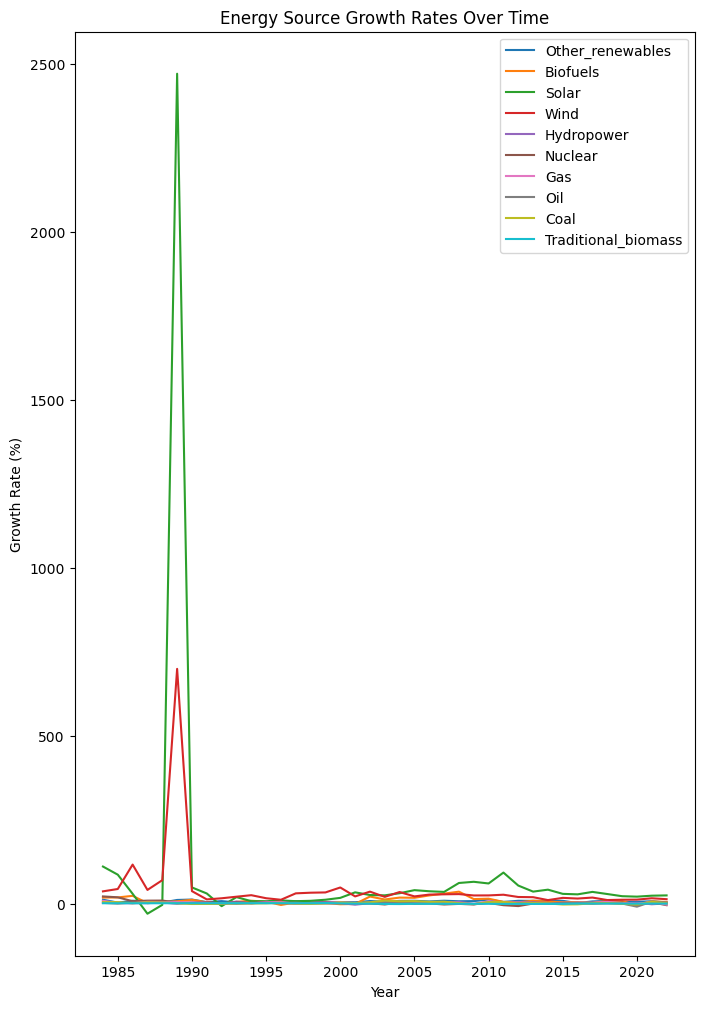

In [129]:
plt.figure(figsize=(8, 12))
for column in growth_rates.columns:
    plt.plot(data['Year'], growth_rates[column], label=column)

plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Energy Source Growth Rates Over Time')
plt.legend()
plt.show()

In [154]:
# Calculate total energy for each year
data['Total_Energy'] = data.iloc[:, 1:].sum(axis=1)
# Calculate market share for each energy source at each year
for column in data.columns[1:-1]:  # Exclude 'Year' and 'Total_Energy' columns
    data[f'{column}_Share'] = (data[column] / data['Total_Energy']) * 100

print(data)


    Year  Other_renewables     Biofuels        Solar         Wind  Hydropower  \
0   1983         211.77058    49.019240     0.008871     0.096974   5552.5425   
1   1984         236.32065    57.806423     0.018662     0.132342   5740.6200   
2   1985         243.15495    68.410090     0.034737     0.189898   5852.6050   
3   1986         263.68542    84.202990     0.044898     0.410523   5931.9126   
4   1987         282.44330    85.330120     0.031353     0.577727   6012.1157   
5   1988         290.86093    89.560196     0.030149     0.980478   6204.8037   
6   1989         322.35043    95.689240     0.775391     7.835361   6172.9750   
7   1990         361.19138   106.642880     1.148346    10.741176   6383.7080   
8   1991         376.81265   110.728714     1.494234    12.082573   6531.1080   
9   1992         404.78116   108.796330     1.379965    13.994874   6530.3900   
10  1993         418.23853   114.444310     1.646089    16.867165   6923.6710   
11  1994         434.65265  

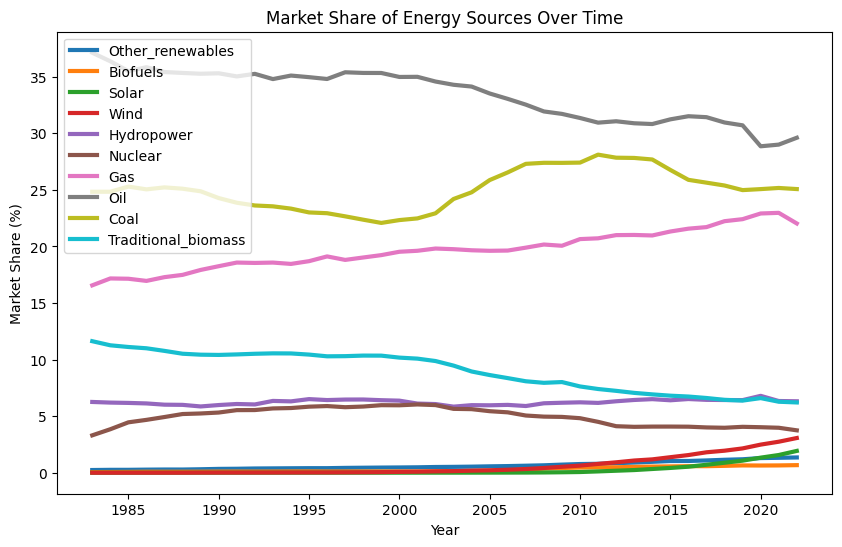

In [155]:
market_share_columns = [col for col in data.columns if col.endswith('_Share')]

# Create a single plot for all market share columns
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot each market share column
for column in market_share_columns:
    plt.plot(data['Year'], data[column], label=column[:-6],linewidth = 3)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.title('Market Share of Energy Sources Over Time')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [156]:

# Extracting only the columns related to energy sources
energy_data = data.drop(['Year', 'Total_Energy'], axis=1)

# Find the dominant energy source for each year
data['Dominant_Source'] = energy_data.idxmax(axis=1)

# Display the shifts in dominant energy source over time
print(data[['Year', 'Dominant_Source']])


    Year Dominant_Source
0   1983             Oil
1   1984             Oil
2   1985             Oil
3   1986             Oil
4   1987             Oil
5   1988             Oil
6   1989             Oil
7   1990             Oil
8   1991             Oil
9   1992             Oil
10  1993             Oil
11  1994             Oil
12  1995             Oil
13  1996             Oil
14  1997             Oil
15  1998             Oil
16  1999             Oil
17  2000             Oil
18  2001             Oil
19  2002             Oil
20  2003             Oil
21  2004             Oil
22  2005             Oil
23  2006             Oil
24  2007             Oil
25  2008             Oil
26  2009             Oil
27  2010             Oil
28  2011             Oil
29  2012             Oil
30  2013             Oil
31  2014             Oil
32  2015             Oil
33  2016             Oil
34  2017             Oil
35  2018             Oil
36  2019             Oil
37  2020             Oil
38  2021             Oil


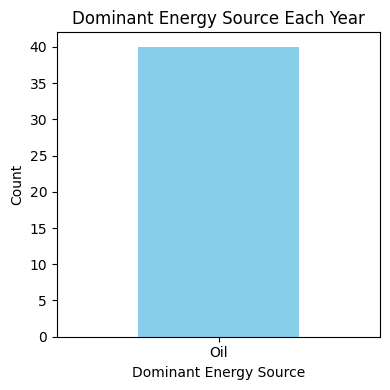

In [133]:
# Count occurrences of each dominant energy source
source_counts = data['Dominant_Source'].value_counts()

# Plotting bar chart for dominant energy source each year
plt.figure(figsize=(4, 4))
source_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Dominant Energy Source')
plt.ylabel('Count')
plt.title('Dominant Energy Source Each Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


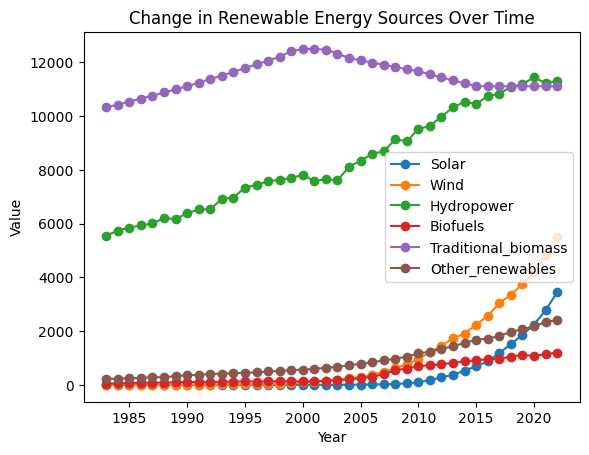

In [134]:

def plot_over_years(columns, title):
    for col in columns:
        plt.plot(data['Year'], data[col], label=col, marker='o', linestyle='-')

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()


renewable_columns = ['Solar', 'Wind', 'Hydropower', 'Biofuels', 'Traditional_biomass', 'Other_renewables']
plot_over_years(renewable_columns, 'Change in Renewable Energy Sources Over Time')

<ipython-input-157-83609c478254>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')


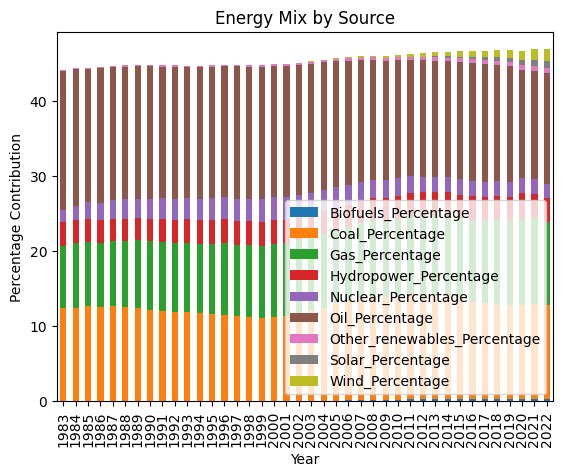

In [157]:
# Convert columns to numeric (if needed)
data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Calculate the total energy sum for each year
data['TTL'] = data.iloc[:, 1:].sum(axis=1)

# Calculate the percentage contribution of each energy source to the total energy mix in each year
col_list = ['Other_renewables', 'Biofuels', 'Solar', 'Wind', 'Hydropower', 'Nuclear', 'Gas', 'Oil', 'Coal']
for col in col_list:
    data[col + '_Percentage'] = data[col] / data['TTL'] * 100

# Create a pivot table to show the percentage contribution of each energy source to the total energy mix in each year
data_pivot = pd.pivot_table(data, values=[col + '_Percentage' for col in col_list], index='Year')

# Plot the pivot table as a stacked bar chart
data_pivot.plot(kind='bar', stacked=True)

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Percentage Contribution')
plt.title('Energy Mix by Source')

# Show the plot
plt.show()


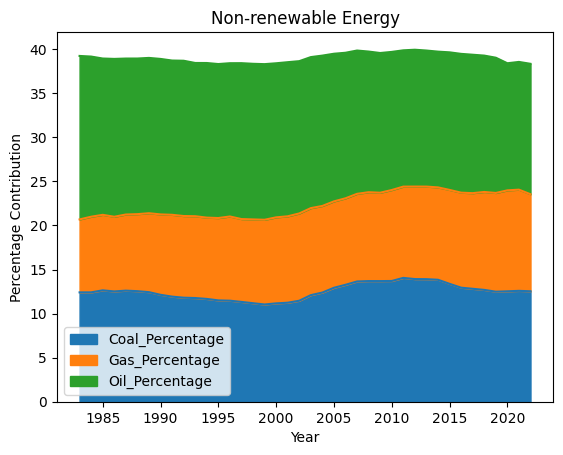

In [136]:
data_pivot_non = pd.pivot_table(data, values=[col + '_Percentage' for col in ['Oil', 'Coal', 'Gas']], index='Year')
# Plot the pivot table as a stacked area chart
data_pivot_non.plot(kind='area', stacked=True)

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Percentage Contribution')
plt.title('Non-renewable Energy')

# Show the plot
plt.show()


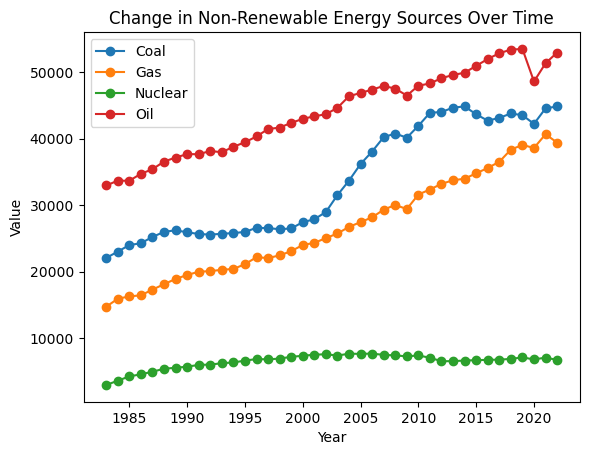

In [137]:
# using the same function but with the non-renewables
non_renewable_columns = ['Coal', 'Gas', 'Nuclear', 'Oil']
plot_over_years(non_renewable_columns, 'Change in Non-Renewable Energy Sources Over Time')

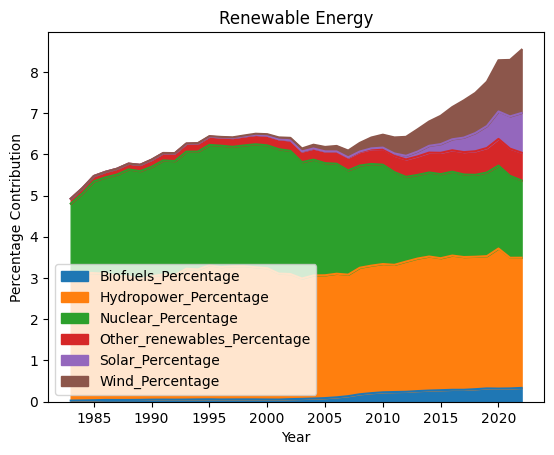

In [158]:
data_pivot_re = pd.pivot_table(data, values=[col + '_Percentage' for col in col_list[:-3]], index='Year')
# Plot the pivot table as a stacked area chart
data_pivot_re.plot(kind='area', stacked=True)

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Percentage Contribution')
plt.title('Renewable Energy')

# Show the plot
plt.show()


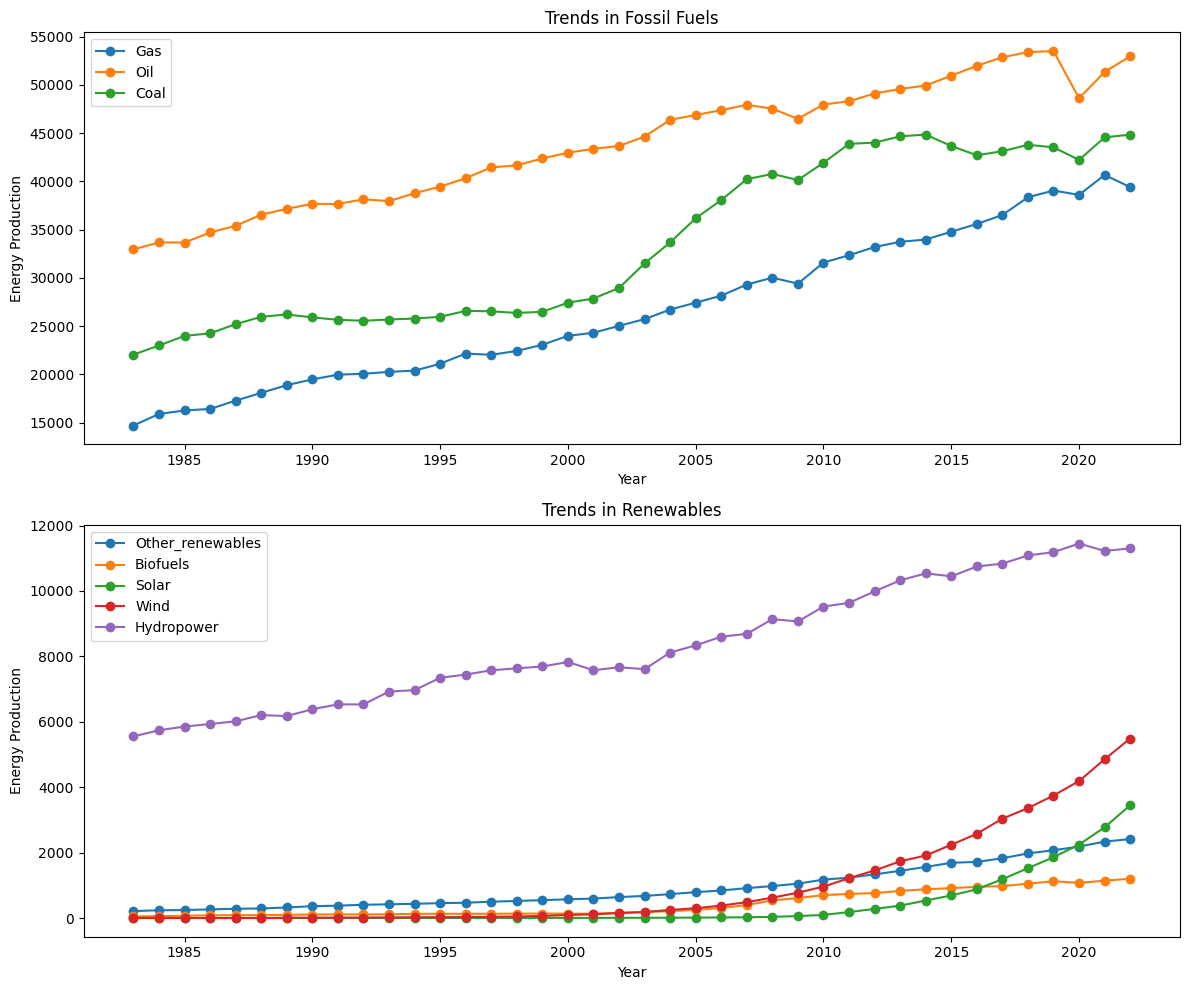

In [159]:
# Assuming the columns are named as specified in your initial question
fossil_fuels = ['Gas', 'Oil', 'Coal']
renewables = ['Other_renewables', 'Biofuels', 'Solar', 'Wind', 'Hydropower']
years = data['Year']

# Creating subplots for fossil fuels and renewables
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plotting trends for fossil fuels
for fuel in fossil_fuels:
    axes[0].plot(years, data[fuel], marker='o', linestyle='-', label=fuel)

axes[0].set_xlabel('Year')
axes[0].set_ylabel('Energy Production')
axes[0].set_title('Trends in Fossil Fuels')
axes[0].legend()

# Plotting trends for renewables
for renewable in renewables:
    axes[1].plot(years, data[renewable], marker='o', linestyle='-', label=renewable)

axes[1].set_xlabel('Year')
axes[1].set_ylabel('Energy Production')
axes[1].set_title('Trends in Renewables')
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

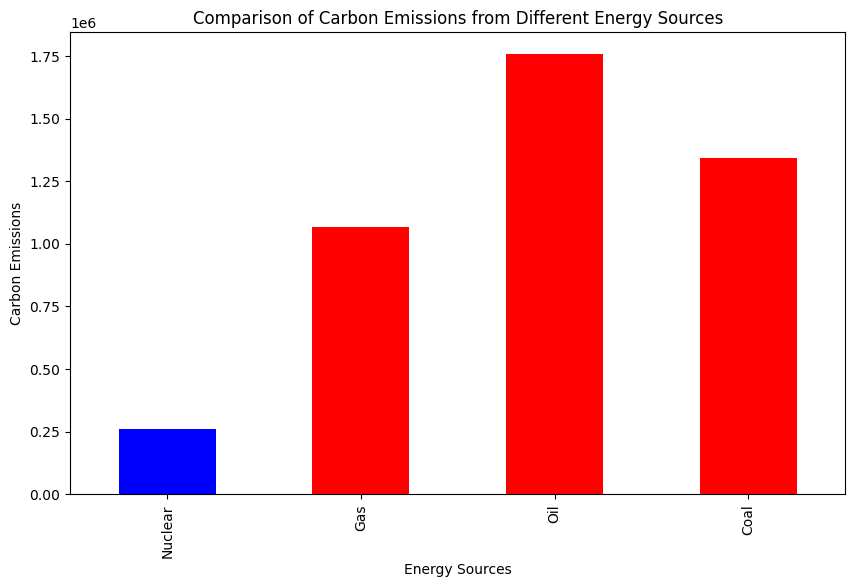

In [140]:
# Compare the carbon emissions of nuclear energy with other sources
carbon_emissions = data[['Nuclear', 'Gas', 'Oil', 'Coal']].sum()

# Create a bar plot to compare carbon emissions of different energy sources
plt.figure(figsize=(10, 6))
carbon_emissions.plot(kind='bar', color=['b', 'r', 'r', 'r'])
plt.xlabel('Energy Sources')
plt.ylabel('Carbon Emissions')
plt.title('Comparison of Carbon Emissions from Different Energy Sources')
plt.show()

Mean Squared Error: 28327.169412626412
R-squared: 0.9999393461984823


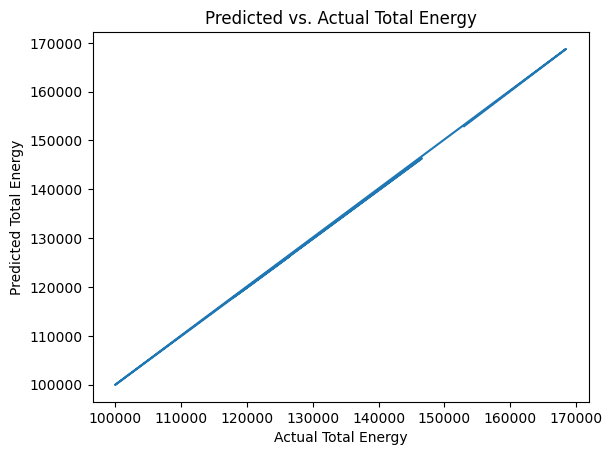

In [160]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Define features and target variable
features = ['Other_renewables', 'Biofuels', 'Solar', 'Wind', 'Hydropower', 'Nuclear', 'Gas', 'Oil', 'Coal']
target = 'Total_Energy'  # Assuming 'Total_Energy' is the target variable

# Split data into features and target
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot predicted vs. actual values
plt.plot(y_test, y_pred)
plt.xlabel('Actual Total Energy')
plt.ylabel('Predicted Total Energy')
plt.title('Predicted vs. Actual Total Energy')
plt.show()


In [161]:
from statsmodels.tsa.ar_model import AutoReg

# Fit AutoRegressive model for total energy consumption
model = AutoReg(data['Total_Energy'], lags=5)  # Example: lag order is 5
model_fit = model.fit()

# Forecast future energy consumption
forecast = model_fit.predict(start=len(data), end=len(data) + 11)  # Forecast for the next 12 steps (12 months/years)

# Present forecast to policymakers for policy planning
print("Forecasted energy consumption:", forecast)


Forecasted energy consumption: 40    179340.325106
41    182605.545127
42    185156.852183
43    187104.555349
44    189548.252072
45    191988.200012
46    194277.983257
47    196641.503501
48    199031.936887
49    201396.360326
50    203772.296259
51    206161.130049
dtype: float64


/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was

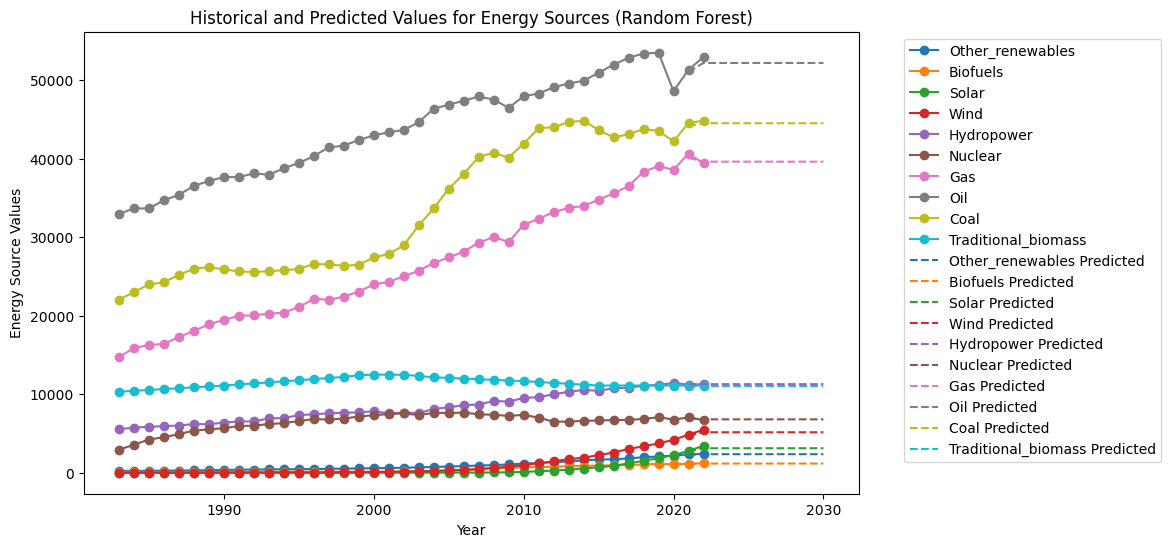

   Year  Other_renewables     Biofuels        Solar         Wind   Hydropower  \
0  2021       2305.882883  1133.955417  2712.234079  4757.941363  11262.84668   
1  2022       2361.221094  1170.033173  3118.249938  5154.911713  11283.58833   
2  2023       2361.221094  1170.033173  3118.249938  5154.911713  11283.58833   
3  2024       2361.221094  1170.033173  3118.249938  5154.911713  11283.58833   
4  2025       2361.221094  1170.033173  3118.249938  5154.911713  11283.58833   
5  2026       2361.221094  1170.033173  3118.249938  5154.911713  11283.58833   
6  2027       2361.221094  1170.033173  3118.249938  5154.911713  11283.58833   
7  2028       2361.221094  1170.033173  3118.249938  5154.911713  11283.58833   
8  2029       2361.221094  1170.033173  3118.249938  5154.911713  11283.58833   
9  2030       2361.221094  1170.033173  3118.249938  5154.911713  11283.58833   

       Nuclear          Gas          Oil         Coal  Traditional_biomass  
0  6954.864147  40112.69738  51

In [169]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract features (Year)
X = data[['Year']]

# Plot the original data
plt.figure(figsize=(10, 6))

# Create an empty dataframe to store all predicted values
all_predictions = pd.DataFrame({'Year': np.arange(2021, 2031)})

# Iterate over each energy source column
for column in data.columns[1:11]:
    # Extract target variable
    y = data[column]

    # Check for and handle missing values in y
    if y.isnull().any():
        continue  # Skip this column if it contains NaN values

    # Create a Random Forest regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X, y)

    # Predict values for the next 10 years
    future_years = np.arange(2021, 2031).reshape(-1, 1)
    future_predictions = model.predict(future_years)

    # Store the predictions in the all_predictions dataframe
    all_predictions[column] = future_predictions

# Plot the linear graph for predicted values
for column in data.columns[1:11]:
    plt.plot(data['Year'], data[column], label=f'{column}', marker='o')

# Plot the linear graph for predicted values
for column in data.columns[1:11]:
    plt.plot(all_predictions['Year'], all_predictions[column], label=f'{column} Predicted', linestyle='dashed')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Energy Source Values')
plt.title('Historical and Predicted Values for Energy Sources (Random Forest)')

# Adjust legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Print the dataframe with all predicted values
print(all_predictions)


/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  w

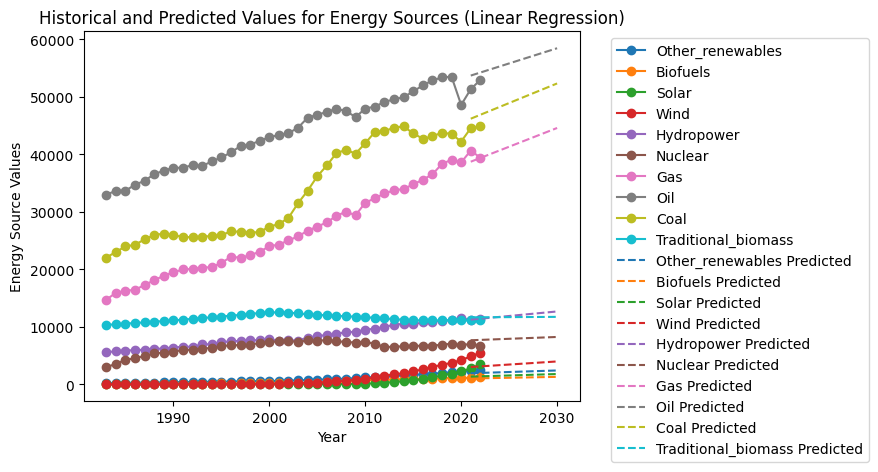

In [170]:
from sklearn.linear_model import LinearRegression

# ...

# Plot the linear graph for historical values
for column in data.columns[1:11]:
    plt.plot(data['Year'], data[column], label=f'{column}', marker='o')

# Plot the linear graph for predicted values using Linear Regression
for column in data.columns[1:11]:
    # Extract target variable
    y = data[column]

    # Check for and handle missing values in y
    if y.isnull().any():
        continue  # Skip this column if it contains NaN values

    # Create a Linear Regression model
    model = LinearRegression()

    # Train the model
    model.fit(X, y)

    # Predict values for the next 10 years
    future_years = np.arange(2021, 2031).reshape(-1, 1)
    future_predictions = model.predict(future_years)

    # Plot the predicted values
    plt.plot(future_years, future_predictions, label=f'{column} Predicted', linestyle='dashed')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Energy Source Values')
plt.title('Historical and Predicted Values for Energy Sources (Linear Regression)')

# Adjust legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [165]:
from sklearn.ensemble import RandomForestRegressor
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict growth rates for energy sources
predicted_growth = model.predict(X_test)

# Provide insights to investors about energy sources with growth potential
print("Predicted growth rates:", predicted_growth)


Predicted growth rates: [12441.96 12384.   12075.56 11816.38 10684.78 11687.82 11111.   11621.03]
